In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [22]:
dataset = pd.read_csv("./data/stud.csv")
dataset.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [25]:
dataset.shape

(1000, 8)

In [26]:
dataset.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [27]:
dataset.duplicated().sum()

np.int64(0)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [30]:
dataset.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [34]:
dataset.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [39]:
print("CATEGORIES IN GENDER VARIABLE : ",end=" ")
print(dataset['gender'].unique())

print("CATEGORIES IN RACE/ETHINICITY : ",end=" ")
print(dataset['race_ethnicity'].unique())

print("CATEGORIES IN PARENTAL LEVEL OF EDUCATION : ",end=" ")
print(dataset['parental_level_of_education'].unique())

print("CATEGORIES IN LUNCH : ",end=" ")
print(dataset['lunch'].unique())

print("CATEGORIES IN TEST PREPARATION COURSE VARIABLE : ",end=" ")
print(dataset['test_preparation_course'].unique())



CATEGORIES IN GENDER VARIABLE :  ['female' 'male']
CATEGORIES IN RACE/ETHINICITY :  ['group B' 'group C' 'group A' 'group D' 'group E']
CATEGORIES IN PARENTAL LEVEL OF EDUCATION :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
CATEGORIES IN LUNCH :  ['standard' 'free/reduced']
CATEGORIES IN TEST PREPARATION COURSE VARIABLE :  ['none' 'completed']


In [43]:
#DEFINE NUMERICAL AND CATEGORICAL 
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != "O"]
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == "O"]

print("WE HAVE {} NUMERICAL FEATURES : {}".format(len(numerical_features),numerical_features))
print("WE HAVE {} CATEGORICAL FEATURES : {}".format(len(categorical_features),categorical_features))


WE HAVE 3 NUMERICAL FEATURES : ['math_score', 'reading_score', 'writing_score']
WE HAVE 5 CATEGORICAL FEATURES : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [46]:
dataset['total_score'] = dataset['math_score'] + dataset['writing_score'] + dataset['reading_score']
dataset['average'] = dataset['total_score']/3
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [55]:
full_math_score = dataset[dataset['math_score'] == 100]['average'].count()
full_reading_score = dataset[dataset['reading_score'] == 100]['average'].count()
full_writing_score = dataset[dataset['writing_score'] == 100]['average'].count()

print("NUMBER OF STUDENTS WITH FULL MARKS IN MATHS : {}".format(full_math_score))
print("NUMBER OF STUDENTS WITH FULL MARKS IN READING : {}".format(full_reading_score))
print("NUMBER OF STUDENTS WITH FULL MARKS IN WRITING : {}".format(full_writing_score))

NUMBER OF STUDENTS WITH FULL MARKS IN MATHS : 7
NUMBER OF STUDENTS WITH FULL MARKS IN READING : 17
NUMBER OF STUDENTS WITH FULL MARKS IN WRITING : 14


<Axes: xlabel='total_score', ylabel='Count'>

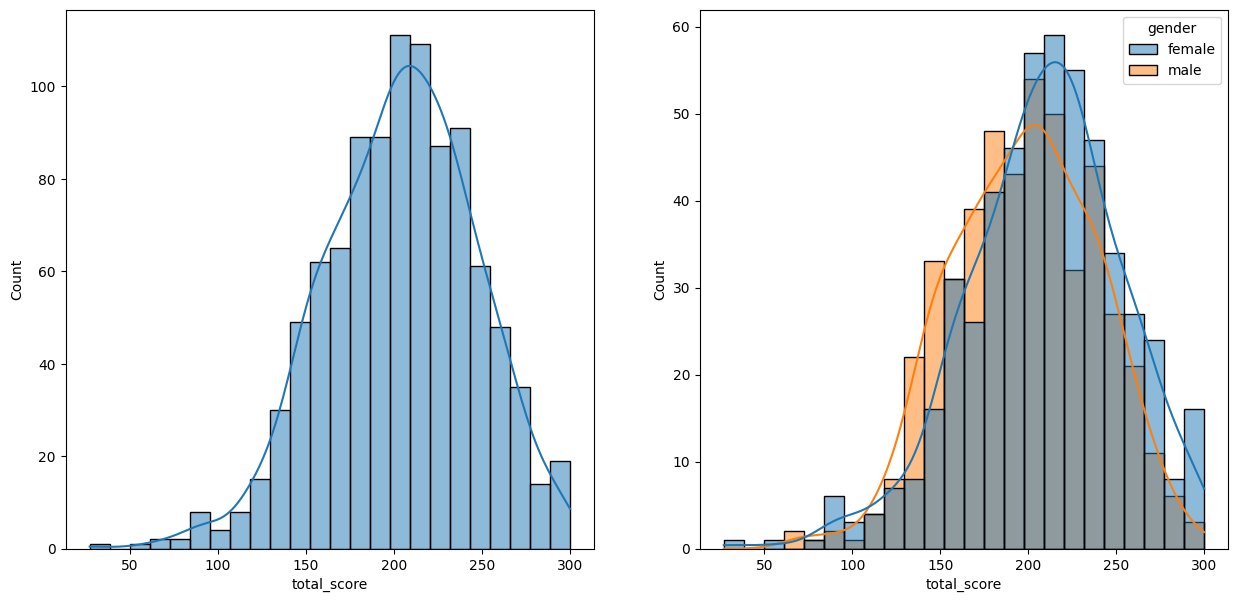

In [70]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=dataset,x='total_score',kde=True)
plt.subplot(122)
sns.histplot(data=dataset,x='total_score',kde=True,hue="gender")